In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle


from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, SGDClassifier
from sklearn.neural_network import MLPClassifier

print("Se încarcă datele...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
fashion = fetch_openml('Fashion-MNIST', version=1, as_frame=False)

def get_ready_data(data, target, size=5000):
    X, y = shuffle(data, target, random_state=42)
    X, y = X[:size] / 255.0, y[:size]
    return train_test_split(X, y, test_size=0.2, random_state=42)

xf_tr, xf_te, yf_tr, yf_te = get_ready_data(fashion.data, fashion.target)
xm_tr, xm_te, ym_tr, ym_te = get_ready_data(mnist.data, mnist.target)

def run_and_show(name, model_class, params_list):
    results = []
    print(f"\n--- Rezultate {name} ---")
    for p in params_list:
        pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=50)), ('model', model_class(**p))])
        pipe.fit(xf_tr, yf_tr); acc_f = accuracy_score(yf_te, pipe.predict(xf_te))
        pipe.fit(xm_tr, ym_tr); acc_m = accuracy_score(ym_te, pipe.predict(xm_te))
        results.append({"Parametri": str(p), "Fashion": round(acc_f, 4), "MNIST": round(acc_m, 4)})
    df = pd.DataFrame(results)
    display(df)
    return df

print("Preprocesare terminata!")

Se încarcă datele...
Preprocesare terminata!


In [ ]:
dt_res = run_and_show("DecisionTree", DecisionTreeClassifier, [
    {"criterion": "entropy", "max_depth": 50, "splitter": "best"},
    {"criterion": "gini", "max_depth": 10, "splitter": "random"}
])


--- Rezultate DecisionTree ---


,Parametri,Fashion,MNIST
0,"{'criterion': 'entropy', 'max_depth': 50, 'spl...",0.695,0.748
1,"{'criterion': 'gini', 'max_depth': 10, 'splitt...",0.691,0.716


In [ ]:
et_res = run_and_show("ExtraTree", ExtraTreeClassifier, [
    {"criterion": "entropy", "max_depth": 100, "splitter": "best"},
    {"criterion": "gini", "max_depth": 50, "splitter": "random"}
])


--- Rezultate ExtraTree ---


,Parametri,Fashion,MNIST
0,"{'criterion': 'entropy', 'max_depth': 100, 'sp...",0.651,0.663
1,"{'criterion': 'gini', 'max_depth': 50, 'splitt...",0.588,0.610


In [ ]:
gnb_res = run_and_show("GaussianNB", GaussianNB, [{"priors": [0.1]*10}])


--- Rezultate GaussianNB ---


,Parametri,Fashion,MNIST
0,"{'priors': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,...",0.705,0.757


In [ ]:
gb_res = run_and_show("GradientBoosting", GradientBoostingClassifier, [
    {"n_estimators": 50, "max_depth": 3},
    {"n_estimators": 10, "max_depth": 10}
])


--- Rezultate GradientBoosting ---


,Parametri,Fashion,MNIST
0,"{'n_estimators': 50, 'max_depth': 3}",0.788,0.877
1,"{'n_estimators': 10, 'max_depth': 10}",0.737,0.771


In [ ]:
knn_res = run_and_show("KNeighbors", KNeighborsClassifier, [
    {"n_neighbors": 5, "weights": "distance", "p": 2},
    {"n_neighbors": 9, "weights": "uniform", "p": 1}
])


--- Rezultate KNeighbors ---


,Parametri,Fashion,MNIST
0,"{'n_neighbors': 5, 'weights': 'distance', 'p': 2}",0.807,0.926
1,"{'n_neighbors': 9, 'weights': 'uniform', 'p': 1}",0.819,0.902


In [ ]:
lsvc_res = run_and_show("LinearSVC", LinearSVC, [
    {"C": 1.0, "loss": "squared_hinge", "multi_class": "ovr"},
    {"C": 10.0, "loss": "hinge", "multi_class": "ovr"}
])


--- Rezultate LinearSVC ---


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Parametri,Fashion,MNIST
0,"{'C': 1.0, 'loss': 'squared_hinge', 'multi_cla...",0.796,0.895
1,"{'C': 10.0, 'loss': 'hinge', 'multi_class': 'o...",0.745,0.854


In [ ]:
lr_res = run_and_show("LogisticRegression", LogisticRegression, [
    {"C": 1, "max_iter": 1000},
    {"C": 100, "max_iter": 1000}
])


--- Rezultate LogisticRegression ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Parametri,Fashion,MNIST
0,"{'C': 1, 'max_iter': 1000}",0.800,0.892
1,"{'C': 100, 'max_iter': 1000}",0.799,0.886


In [ ]:
mlp_res = run_and_show("MLPClassifier", MLPClassifier, [
    {"hidden_layer_sizes": (100,), "activation": "relu", "max_iter": 300},
    {"hidden_layer_sizes": (10, 10), "activation": "tanh", "max_iter": 300}
])


--- Rezultate MLPClassifier ---


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


,Parametri,Fashion,MNIST
0,"{'hidden_layer_sizes': (100,), 'activation': '...",0.807,0.937
1,"{'hidden_layer_sizes': (10, 10), 'activation':...",0.789,0.874


In [ ]:
pa_res = run_and_show("PassiveAggressive", PassiveAggressiveClassifier, [{"C": 1}, {"C": 100}])


--- Rezultate PassiveAggressive ---


,Parametri,Fashion,MNIST
0,{'C': 1},0.728,0.815
1,{'C': 100},0.735,0.850


In [ ]:
per_res = run_and_show("Perceptron", Perceptron, [{"penalty": "l1"}, {"penalty": "elasticnet"}])


--- Rezultate Perceptron ---


,Parametri,Fashion,MNIST
0,{'penalty': 'l1'},0.705,0.861
1,{'penalty': 'elasticnet'},0.747,0.821


In [ ]:
rf_res = run_and_show("RandomForest", RandomForestClassifier, [
    {"n_estimators": 100, "max_depth": 50, "n_jobs": -1},
    {"n_estimators": 50, "max_depth": 10, "n_jobs": -1}
])


--- Rezultate RandomForest ---


,Parametri,Fashion,MNIST
0,"{'n_estimators': 100, 'max_depth': 50, 'n_jobs...",0.807,0.902
1,"{'n_estimators': 50, 'max_depth': 10, 'n_jobs'...",0.780,0.887


In [ ]:
sgd_res = run_and_show("SGDClassifier", SGDClassifier, [
    {"loss": "hinge", "penalty": "l2"},
    {"loss": "log_loss", "penalty": "l1"}
])


--- Rezultate SGDClassifier ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


,Parametri,Fashion,MNIST
0,"{'loss': 'hinge', 'penalty': 'l2'}",0.778,0.878
1,"{'loss': 'log_loss', 'penalty': 'l1'}",0.772,0.877


In [ ]:
svc_res = run_and_show("SVC", SVC, [
    {"C": 10, "kernel": "rbf"},
    {"C": 1, "kernel": "poly"}
])


--- Rezultate SVC ---


,Parametri,Fashion,MNIST
0,"{'C': 10, 'kernel': 'rbf'}",0.827,0.940
1,"{'C': 1, 'kernel': 'poly'}",0.787,0.904



--- FINAL RANKING OF MODELS (Sorted by MNIST) ---


,Model,MNIST,Fashion
12,SVC,0.940,0.827
7,MLPClassifier,0.937,0.807
4,KNeighbors,0.926,0.807
10,RandomForest,0.902,0.807
5,LinearSVC,0.895,0.796
6,LogisticRegression,0.892,0.800
11,SGDClassifier,0.878,0.778
3,GradientBoosting,0.877,0.788
9,Perceptron,0.861,0.705
8,PassiveAggressive,0.850,0.735


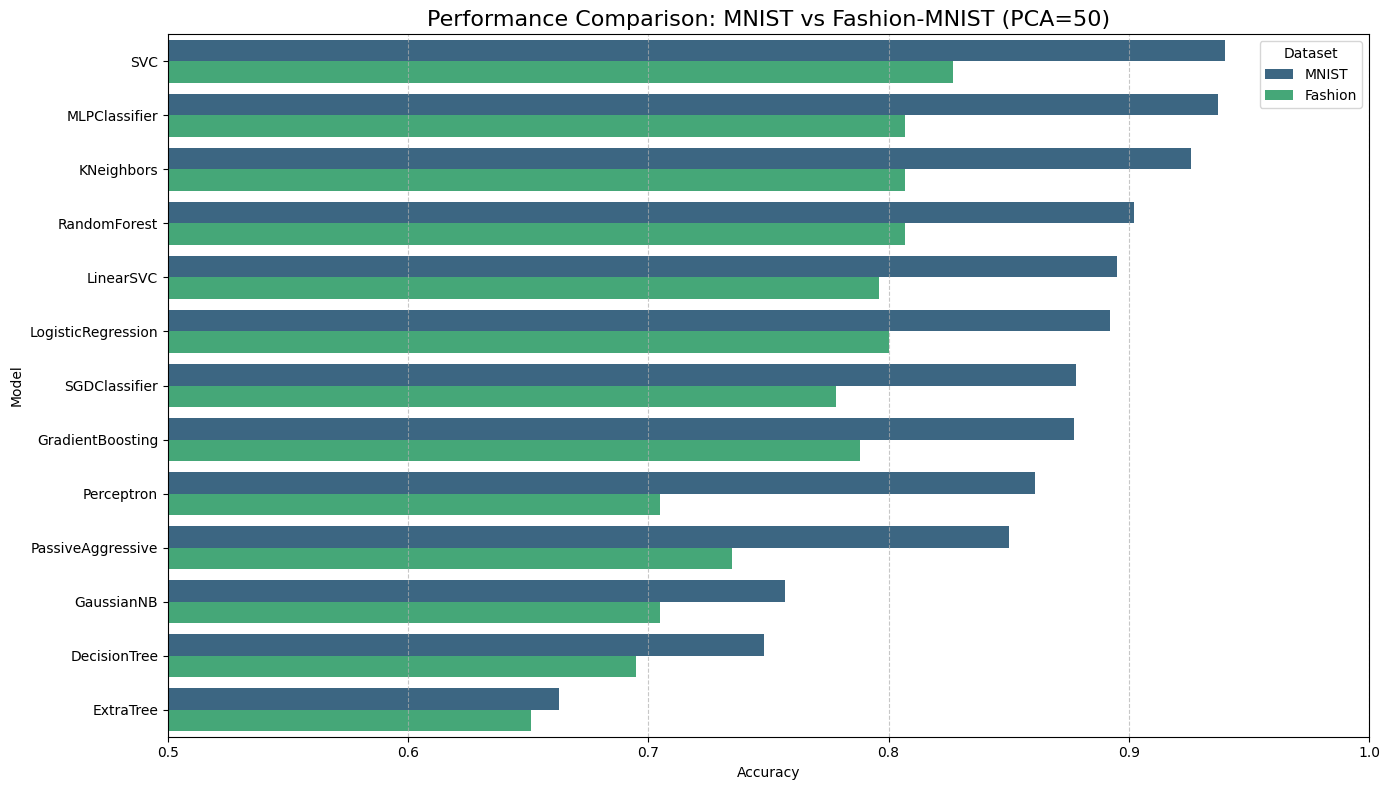

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


all_dfs = {
    "DecisionTree": dt_res, "ExtraTree": et_res, "GaussianNB": gnb_res,
    "GradientBoosting": gb_res, "KNeighbors": knn_res, "LinearSVC": lsvc_res,
    "LogisticRegression": lr_res, "MLPClassifier": mlp_res, "PassiveAggressive": pa_res,
    "Perceptron": per_res, "RandomForest": rf_res, "SGDClassifier": sgd_res, "SVC": svc_res
}

summary_list = []

for name, df in all_dfs.items():

    best_row = df.loc[df['MNIST'].idxmax()]
    summary_list.append({
        "Model": name,
        "MNIST": best_row['MNIST'],
        "Fashion": best_row['Fashion']
    })


df_summary = pd.DataFrame(summary_list).sort_values(by="MNIST", ascending=False)


print("\n--- FINAL RANKING OF MODELS (Sorted by MNIST) ---")
display(df_summary)


plt.figure(figsize=(14, 8))
df_melted = df_summary.melt(id_vars="Model", var_name="Dataset", value_name="Accuracy")

sns.barplot(data=df_melted, x="Accuracy", y="Model", hue="Dataset", palette="viridis")
plt.title("Performance Comparison: MNIST vs Fashion-MNIST (PCA=50)", fontsize=16)
plt.xlim(0.5, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()